In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df['quality'].value_counts()

5    680
6    637
7    199
4     52
8     18
3     10
Name: quality, dtype: int64

In [6]:
quality_mapping = {3:0,4:1,5:2,6:3,7:4,8:5}

In [9]:
df["quality"] = df["quality"].map(quality_mapping)

In [11]:
df = df.sample(frac = 1).reset_index(drop = True)

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.5,0.63,0.33,1.8,0.059,16.0,28.0,0.99531,3.36,0.64,10.1,3
1,10.8,0.50,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,2
2,7.4,0.29,0.38,1.7,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,3
3,6.5,0.88,0.03,5.6,0.079,23.0,47.0,0.99572,3.58,0.50,11.2,1
4,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,9.5,0.86,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0,2
1592,7.8,0.53,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,2
1593,11.5,0.31,0.51,2.2,0.079,14.0,28.0,0.99820,3.03,0.93,9.8,3
1594,11.8,0.33,0.49,3.4,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,4


In [14]:
df_train = df.head(1000)
df_test = df.tail(599)

In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=7)
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [31]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [32]:
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

In [33]:
print("Traning accuracy 7------->",train_accuracy*100)
print("Test accuracy 7---------->",test_accuracy*100)

Traning accuracy 7-------> 77.8
Test accuracy 7----------> 57.095158597662774


In [29]:
print("Traning accuracy depth 3 ----->",train_accuracy*100)
print("Test accuracy depth 3------->",test_accuracy*100)

Traning accuracy depth 3 -----> 59.9
Test accuracy depth 3-------> 55.926544240400666


In [34]:
# Tryimg for different value of k

In [36]:
from sklearn import tree
from sklearn import metrics

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:

%matplotlib inline

In [56]:
train_accuracy = [0.5]
test_accuracy = [0.5]
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols],df_train.quality)
    
    trainp = clf.predict (df_train[cols])
    testp =  clf.predict (df_test[cols])

    traina = metrics.accuracy_score(df_train.quality,trainp)
    testa = metrics.accuracy_score(df_test.quality,testp)
    
    train_accuracy.append(traina)
    test_accuracy.append(testa)

In [65]:
train_accuracy

[0.5,
 0.553,
 0.553,
 0.599,
 0.649,
 0.681,
 0.732,
 0.778,
 0.82,
 0.858,
 0.886,
 0.911,
 0.93,
 0.939,
 0.952,
 0.964,
 0.97,
 0.976,
 0.986,
 0.992,
 0.995,
 0.998,
 0.999,
 0.999,
 1.0]

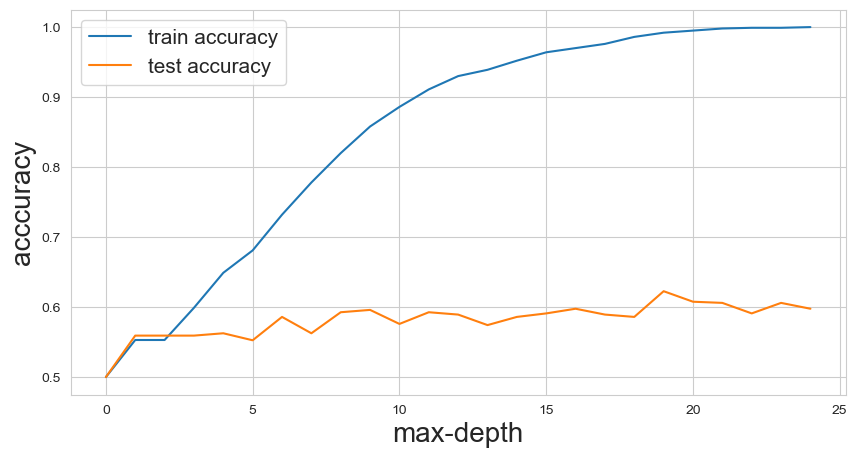

In [68]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

plt.plot(train_accuracy,label = "train accuracy")
plt.plot(test_accuracy,label = "test accuracy")

plt.legend(loc="best",prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max-depth",size = 20)
plt.ylabel("acccuracy",size = 20)

plt.show()

In [70]:
df['kfold'] = -1

In [71]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,6.5,0.63,0.33,1.8,0.059,16.0,28.0,0.99531,3.36,0.64,10.1,3,-1
1,10.8,0.50,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,2,-1
2,7.4,0.29,0.38,1.7,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,3,-1
3,6.5,0.88,0.03,5.6,0.079,23.0,47.0,0.99572,3.58,0.50,11.2,1,-1
4,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,9.5,0.86,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0,2,-1
1592,7.8,0.53,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,2,-1
1593,11.5,0.31,0.51,2.2,0.079,14.0,28.0,0.99820,3.03,0.93,9.8,3,-1
1594,11.8,0.33,0.49,3.4,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,4,-1


In [74]:
df = df.sample(frac=1).reset_index(drop = True)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.4,0.395,0.46,4.6,0.094,3.0,10.0,0.99639,3.27,0.64,12.2,4,-1
1,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9,2,-1
2,6.1,0.400,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.1,4,-1
3,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6,1,-1
4,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,3,-1
1592,11.2,0.660,0.24,2.5,0.085,16.0,53.0,0.99930,3.06,0.72,11.0,3,-1
1593,9.6,0.420,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,3,-1
1594,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,3,-1


In [77]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [81]:
for fold,(trn_,val_) in enumerate(kf.split(X=df)):
    df.loc[val_,'kfold'] = fold

In [82]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.4,0.395,0.46,4.6,0.094,3.0,10.0,0.99639,3.27,0.64,12.2,4,0
1,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9,2,0
2,6.1,0.400,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.1,4,0
3,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6,1,0
4,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,3,4
1592,11.2,0.660,0.24,2.5,0.085,16.0,53.0,0.99930,3.06,0.72,11.0,3,4
1593,9.6,0.420,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,3,4
1594,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,3,4


# Regreesion Problem 

In [3]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

In [5]:
X,y =datasets.make_regression(n_samples =150000,n_features=100,n_targets=1)

In [14]:
# convert this into pandas data Frame
df =  pd.DataFrame(X,columns = [f"f_{i}" for i in range(X.shape[1])])

In [27]:
df["target"] = y

In [28]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target
0,-0.753829,0.044247,0.251516,-0.033466,1.373819,0.237289,1.914468,0.925718,-1.229360,-1.291968,...,-0.931662,2.431901,-0.241991,-0.795008,-1.680226,0.675094,-1.126379,0.378581,1.482546,-251.945520
1,-0.616435,0.057100,-0.320363,-1.530597,-0.028743,1.021122,-0.905373,-1.317570,0.736003,-1.052571,...,-0.625723,0.191848,0.554557,-2.117420,-0.230960,-0.382432,0.224733,-1.079730,-1.105557,-447.131300
2,-1.399669,-0.911014,-1.456164,-1.362217,1.634512,0.222179,2.011573,-1.706035,0.913550,-0.099666,...,-0.356382,0.337610,-0.472692,0.283803,-0.288802,-1.047750,1.231206,0.839623,0.227977,-98.994207
3,0.994389,-0.560950,-1.396529,0.457187,0.224986,0.981746,1.578001,-0.723183,1.062661,0.269408,...,-0.268175,0.561208,2.165599,0.147873,0.174395,0.362257,0.218837,0.801341,-0.044394,289.269606
4,-0.839903,0.623595,-0.150167,-0.226887,1.379160,-0.638587,0.726020,0.799123,-1.511685,0.453328,...,0.686534,-1.196640,-1.837304,0.087686,-0.129999,0.214109,1.491703,0.063387,-0.031398,-210.901117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.608212,-0.233287,0.667726,0.164600,-0.186095,0.190779,-1.300776,-0.478781,-0.855548,-1.371408,...,-0.983031,-0.716274,2.068246,2.284626,-0.696854,-0.105236,-0.681047,1.541321,-0.251656,-346.194176
149996,-1.971684,-0.869708,0.078863,1.045713,-0.380692,-1.550069,-0.970404,0.797722,-0.800358,-0.883365,...,0.735864,0.154600,0.466224,-1.298046,-0.483318,-2.621319,1.274589,0.475534,-0.333023,-330.476820
149997,-0.833739,-0.845614,-2.163435,1.184253,-0.629575,-0.827976,1.119838,-1.229673,1.569761,0.367761,...,-0.309674,3.113435,-1.207117,-1.503858,-1.009390,-1.401653,-0.046981,1.725548,-1.154258,36.179252
149998,-0.723801,2.484658,-1.038777,0.349851,-0.903113,-0.467778,0.361233,-1.176421,-0.044170,0.946360,...,-0.092873,0.014152,2.132117,0.274034,0.148929,0.535480,-0.086221,1.072829,-1.124187,65.651924


# Cross validation

In [29]:
#create new column for cross validation and fill it with -1
df['k_fold'] = -1

In [30]:
# Then we just have to randomize the data
df = df.sample(frac=1).reset_index(drop = True)

In [32]:
#want to clute the numberof beans
nums_bins = int(np.floor(1 + np.log2(len(df))))

In [33]:
nums_bins

18

In [34]:
df['bins'] = pd.cut(df['target'],bins=nums_bins,labels=False)

In [35]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,k_fold,bins
0,0.125836,-1.773930,-0.161605,0.649515,0.188119,0.403444,0.725483,-0.733662,1.345303,-0.169057,...,0.837988,0.222321,-1.164440,1.560731,-0.460745,-0.178842,0.354041,-103.933489,-1,8
1,0.508012,-0.679991,-0.045996,-0.428265,1.017182,-1.167001,-0.566114,0.218371,0.584875,0.662479,...,-1.385062,3.300697,0.648177,0.898716,-1.338305,1.004055,-0.503290,3.414799,-1,8
2,-0.890089,-1.171292,-2.094564,-2.977423,1.690029,-0.378032,-0.818042,1.340832,-1.372318,-1.716200,...,-2.258653,-0.644966,-2.491292,2.223050,2.122525,-0.134239,0.037043,-127.294470,-1,7
3,0.409588,1.607238,-0.336170,-2.456770,0.685499,0.552371,-0.546158,-1.842099,0.406206,0.345215,...,0.808461,-0.440007,-1.259351,-0.323495,0.876746,0.100852,-1.174320,351.904721,-1,11
4,-1.703437,-0.273905,0.547969,-0.515838,0.117330,1.559224,-0.602160,1.016442,0.464970,-0.559968,...,-0.309832,1.390701,1.038402,0.365694,1.385703,-0.072625,0.022515,200.622295,-1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.331603,-1.590500,1.318351,-0.053279,0.432154,-0.374977,2.628284,1.614166,-1.250235,0.105785,...,0.625498,-0.851440,-0.592726,2.067749,1.450203,-0.329988,-1.519201,518.537424,-1,13
149996,-0.785695,-2.181656,1.573778,-0.521076,-0.474135,1.871577,0.292845,0.011391,1.059359,-0.654677,...,0.570992,-0.749286,-0.875078,-1.120213,-0.765456,1.652759,0.800882,13.167232,-1,9
149997,-0.196075,0.142390,0.513579,-0.347988,0.722288,0.678500,-1.000405,1.078131,-1.643344,-0.227970,...,-0.162027,0.625311,-1.043239,-1.336739,-0.951922,1.268793,0.835494,191.055230,-1,10
149998,-0.543076,-0.807293,1.424773,-0.784187,1.707926,0.243554,0.724862,-0.953552,1.336579,1.529318,...,1.438235,0.505322,-1.148881,-0.444179,0.246285,2.031736,0.316667,47.522603,-1,9


In [36]:
kf =  model_selection.StratifiedKFold(n_splits=5)

In [37]:
for f,(t_,v_) in enumerate(kf.split(X = df , y =df.bins.values)):
    df['k_fold']  = f

C:\Users\Aniket\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [38]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,k_fold,bins
0,0.125836,-1.773930,-0.161605,0.649515,0.188119,0.403444,0.725483,-0.733662,1.345303,-0.169057,...,0.837988,0.222321,-1.164440,1.560731,-0.460745,-0.178842,0.354041,-103.933489,4,8
1,0.508012,-0.679991,-0.045996,-0.428265,1.017182,-1.167001,-0.566114,0.218371,0.584875,0.662479,...,-1.385062,3.300697,0.648177,0.898716,-1.338305,1.004055,-0.503290,3.414799,4,8
2,-0.890089,-1.171292,-2.094564,-2.977423,1.690029,-0.378032,-0.818042,1.340832,-1.372318,-1.716200,...,-2.258653,-0.644966,-2.491292,2.223050,2.122525,-0.134239,0.037043,-127.294470,4,7
3,0.409588,1.607238,-0.336170,-2.456770,0.685499,0.552371,-0.546158,-1.842099,0.406206,0.345215,...,0.808461,-0.440007,-1.259351,-0.323495,0.876746,0.100852,-1.174320,351.904721,4,11
4,-1.703437,-0.273905,0.547969,-0.515838,0.117330,1.559224,-0.602160,1.016442,0.464970,-0.559968,...,-0.309832,1.390701,1.038402,0.365694,1.385703,-0.072625,0.022515,200.622295,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.331603,-1.590500,1.318351,-0.053279,0.432154,-0.374977,2.628284,1.614166,-1.250235,0.105785,...,0.625498,-0.851440,-0.592726,2.067749,1.450203,-0.329988,-1.519201,518.537424,4,13
149996,-0.785695,-2.181656,1.573778,-0.521076,-0.474135,1.871577,0.292845,0.011391,1.059359,-0.654677,...,0.570992,-0.749286,-0.875078,-1.120213,-0.765456,1.652759,0.800882,13.167232,4,9
149997,-0.196075,0.142390,0.513579,-0.347988,0.722288,0.678500,-1.000405,1.078131,-1.643344,-0.227970,...,-0.162027,0.625311,-1.043239,-1.336739,-0.951922,1.268793,0.835494,191.055230,4,10
149998,-0.543076,-0.807293,1.424773,-0.784187,1.707926,0.243554,0.724862,-0.953552,1.336579,1.529318,...,1.438235,0.505322,-1.148881,-0.444179,0.246285,2.031736,0.316667,47.522603,4,9


In [44]:
df['k_fold'].value_counts()

4    150000
Name: k_fold, dtype: int64